# Module 10: Artificial Neural Networks

## For our first example this week we are going to do some bank churn modeling.

In [7]:
import pandas as pd
bank_churn = pd.read_csv('Churn Modeling.csv') #https://www.kaggle.com/santoshd3/bank-customers

### Step 1: Check for data issues

In [8]:
bank_churn.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [9]:
bank_churn.isnull().values.any()

False

### Step 2: Check for data shape

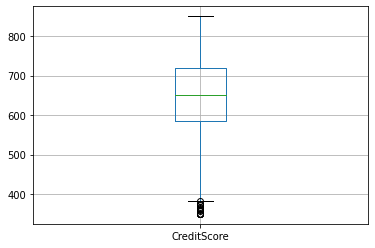

normal test result:  NormaltestResult(statistic=132.82837928588427, pvalue=1.434445056038405e-29)
kstest test result:  KstestResult(statistic=1.0, pvalue=0.0)


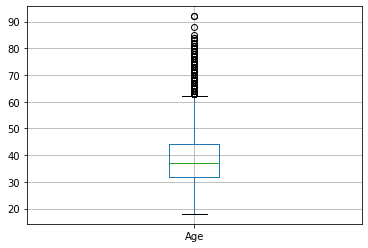

normal test result:  NormaltestResult(statistic=1507.7908881363314, pvalue=0.0)
kstest test result:  KstestResult(statistic=1.0, pvalue=0.0)


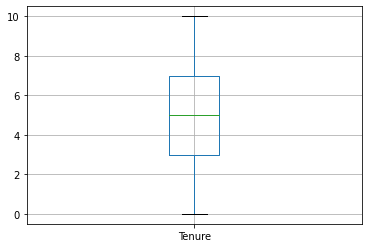

normal test result:  NormaltestResult(statistic=6481.918283079272, pvalue=0.0)
kstest test result:  KstestResult(statistic=0.8324498680518208, pvalue=0.0)


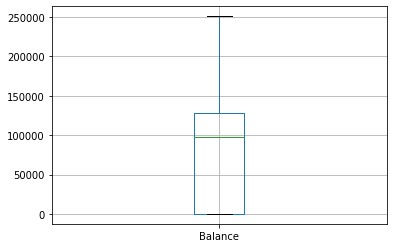

normal test result:  NormaltestResult(statistic=62973.389518519696, pvalue=0.0)
kstest test result:  KstestResult(statistic=0.6383, pvalue=0.0)


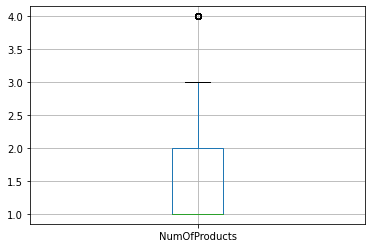

normal test result:  NormaltestResult(statistic=832.9888632346675, pvalue=1.3145182051633007e-181)
kstest test result:  KstestResult(statistic=0.8413447460685429, pvalue=0.0)


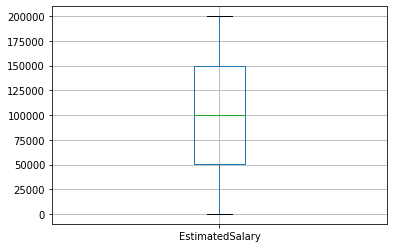

normal test result:  NormaltestResult(statistic=7397.149829198932, pvalue=0.0)
kstest test result:  KstestResult(statistic=1.0, pvalue=0.0)


In [10]:
import matplotlib.pyplot as plt
from scipy.stats import normaltest 
from scipy.stats import kstest

for column in bank_churn.loc[:,['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]:
    plt.figure()
    bank_churn.boxplot([column])
    plt.show()
    print("normal test result: ",normaltest(bank_churn[column]))
    print("kstest test result: ", kstest(bank_churn[column], 'norm'))

### Let's look at the hist plots and do tranformations where it seems a good idea
### I've used a special version of boxcox here because some of my columns contain zeros which won't work for normal boxcox

CreditScore


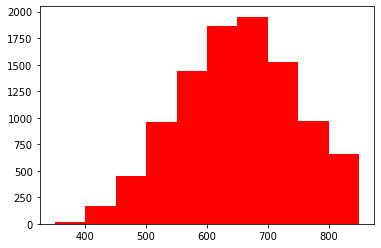

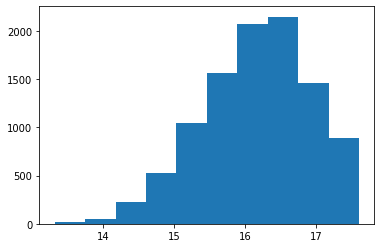

Age


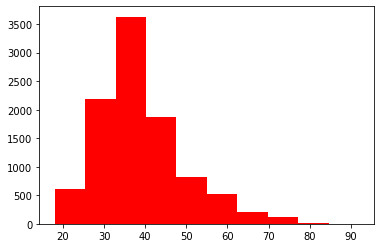

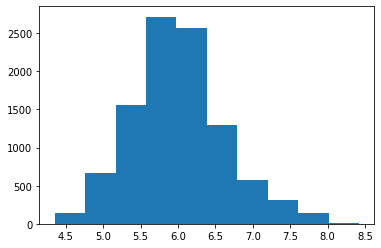

Tenure


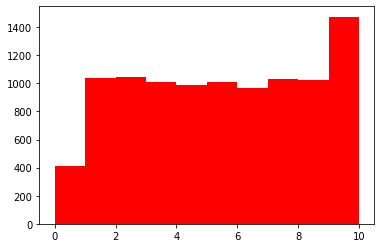

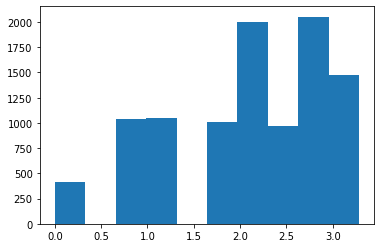

Balance


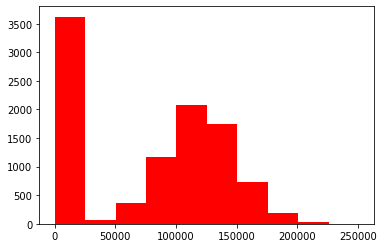

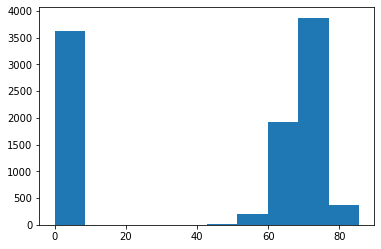

NumOfProducts


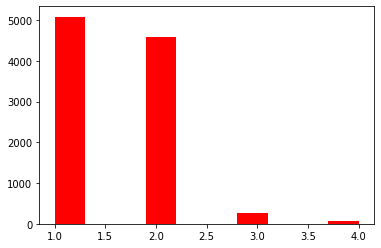

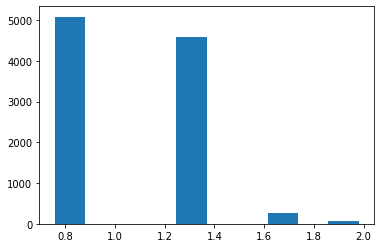

EstimatedSalary


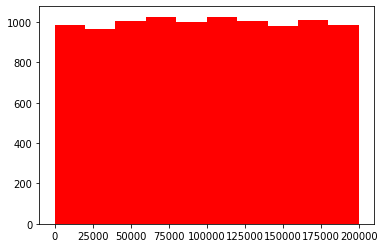

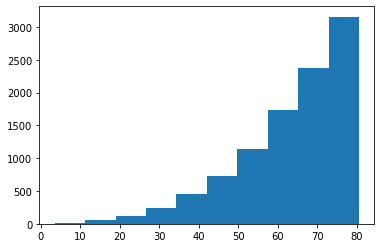

In [11]:
from matplotlib import pyplot
#from scipy.stats import boxcox
from scipy.special import boxcox1p as boxcoxzeros

for column in bank_churn.loc[:,['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]:
    print(column)
    pyplot.hist(bank_churn[column],color='r')
    pyplot.show()
    result = boxcoxzeros(bank_churn[column],0.25)
    #print(tran_lambda)
    pyplot.hist(result)
    pyplot.show()

### It looks like age and balance could be helped with a transform

In [12]:
for column in bank_churn.loc[:,['Age','Balance']]:
    result = boxcoxzeros(bank_churn[column],0.25)
    bank_churn[column] = result

### Step 3: Column encoding and scaling all at once!

### We have two columns that we will need to one-hot encode to ensure we can model using the data.  We also have 6 columns that need to be scaled

### First we'll convert to NumPy

In [13]:
bank_churn_np = bank_churn.iloc[:,3:].to_numpy()

### Now we'll use ColumnTransformer to do both our OneHot and StandardScaler to the appropriate columns

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
np.set_printoptions(suppress=True)

transformer = ColumnTransformer(transformers=[('ohe',OneHotEncoder(),[1,2]),('scs',StandardScaler(),[0,3,4,5,6,9])],remainder = 'passthrough')
bank_churn_prepped = transformer.fit_transform(bank_churn_np)
print(bank_churn_prepped)
print(bank_churn_prepped.shape)

[[1.0 0.0 0.0 ... 1 1 1]
 [0.0 0.0 1.0 ... 0 1 0]
 [1.0 0.0 0.0 ... 1 0 1]
 ...
 [1.0 0.0 0.0 ... 0 1 1]
 [0.0 1.0 0.0 ... 1 0 1]
 [1.0 0.0 0.0 ... 1 0 0]]
(10000, 14)


### Step 4: Train/Test Split

In [15]:
bank_churn_prepped[:,-1:]

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=object)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    bank_churn_prepped[:,:-1],bank_churn_prepped[:,-1:], test_size=0.2, random_state = 0)

In [17]:
print(x_train[:3,:],end="\n\n")
print(y_train[:100,:],end="\n\n")

[[0.0 0.0 1.0 1.0 0.0 0.17042381209090204 -0.4175959769926644
  -0.004425957213915414 -1.3191496442530863 0.8077365626180215
  1.1083818665945437 1 0]
 [0.0 1.0 0.0 0.0 1.0 -2.31280235854734 0.3935267194327369
  -1.3875375865624426 0.5231743229069395 -0.9115834940401767
  -0.7475920922902852 1 1]
 [1.0 0.0 0.0 1.0 0.0 -1.1953505817601309 -0.9982431863791996
  -1.0417596792253108 0.7267850425844853 -0.9115834940401767
  1.4874641700076732 1 0]]

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]



### Step 5: Set up model

In [21]:
from sklearn.neural_network import MLPClassifier #Multi-Layer Perceptron using backpropagation
classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1,max_iter=1100)

In [22]:
print(type(x_train))
print(x_train.shape)
print(type(y_train.reshape(-1,1)))
print(y_train.shape)
print(y_train.dtype)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

<class 'numpy.ndarray'>
(8000, 13)
<class 'numpy.ndarray'>
(8000, 1)
int32


In [23]:
classifier.fit(x_train,y_train.ravel())

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 5), max_iter=1100,
              random_state=1, solver='lbfgs')

### Step 6: Check Model Quality

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score
test_output = classifier.predict(x_test)
#print(y_test.ravel())
cm = confusion_matrix(y_test.ravel(), test_output)
ac = accuracy_score(y_test.ravel(), test_output)

In [25]:
print(cm)
print(ac)

[[1513   82]
 [ 194  211]]
0.862


### Example #2

### In this example, we are going to try to predict heating load and cooling load based on several data features

In [26]:
import pandas as pd
heating_cooling_data = pd.read_csv("Energy Efficiency.csv")

In [27]:
heating_cooling_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


### Our dependent variables are continuous so we're going to need to do some conversion if we want to use a classification model

### Let's bucket those variables into 4 buckets

In [28]:
pd.qcut(heating_cooling_data['Y1'], q=4)

0      (12.992, 18.95]
1      (12.992, 18.95]
2      (12.992, 18.95]
3      (12.992, 18.95]
4      (18.95, 31.668]
            ...       
763    (12.992, 18.95]
764    (12.992, 18.95]
765    (12.992, 18.95]
766    (12.992, 18.95]
767    (12.992, 18.95]
Name: Y1, Length: 768, dtype: category
Categories (4, interval[float64]): [(6.0089999999999995, 12.992] < (12.992, 18.95] < (18.95, 31.668] < (31.668, 43.1]]

In [29]:
heating_cooling_labels = ['low','medium','high','very high']
heating_cooling_data['Y1_buck'] = pd.qcut(heating_cooling_data['Y1'], q=4,labels = heating_cooling_labels)
heating_cooling_data['Y2_buck'] = pd.qcut(heating_cooling_data['Y2'], q=4,labels = heating_cooling_labels)

In [30]:
heating_cooling_data.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Y1_buck,Y2_buck
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,medium,medium
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,medium,medium
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,medium,medium
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,medium,medium
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,high,high
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38,high,high
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16,high,high
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60,high,high
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30,high,high
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97,high,medium


* X1 Relative Compactness
* X2 Surface Area
* X3 Wall Area
* X4 Roof Area
* X5 Overall Height
* X6 Orientation
* X7 Glazing Area
* X8 Glazing Area Distribution
* y1 Heating Load
* y2 Cooling Load

### Now we can covert to NumPy, encode, and scale

In [31]:
x_heat_model_data = heating_cooling_data.loc[:,["X1","X2","X3","X4","X5","X6","X7","X8","Y1_buck"]].to_numpy()
x_cool_model_data = heating_cooling_data.loc[:,["X1","X2","X3","X4","X5","X6","X7","X8","Y2_buck"]].to_numpy()

### Unfortunately labelencoder doesn't work in ColumnTransformer so I have to do it separately

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

le = LabelEncoder()
transformer = ColumnTransformer(transformers=[('scs',StandardScaler(),[0,1,2,3,4,5,6,7])],remainder = 'passthrough')
x_heat_model_data_prepped = transformer.fit_transform(x_heat_model_data)
x_cool_model_data_prepped = transformer.fit_transform(x_cool_model_data)
x_heat_model_data_prepped[:,8] = le.fit_transform(x_heat_model_data_prepped[:,8].astype('str'))
x_cool_model_data_prepped[:,8] = le.fit_transform(x_cool_model_data_prepped[:,8].astype('str'))
print(x_heat_model_data_prepped)
print(x_heat_model_data_prepped.shape)

[[2.041776714868123 -1.7858748871144468 -0.5619514869490164 ...
  -1.7604469755488257 -1.8145751367274014 2]
 [2.041776714868123 -1.7858748871144468 -0.5619514869490164 ...
  -1.7604469755488257 -1.8145751367274014 2]
 [2.041776714868123 -1.7858748871144468 -0.5619514869490164 ...
  -1.7604469755488257 -1.8145751367274014 2]
 ...
 [-1.363812245838553 1.5539430835930892 1.1239029738980328 ...
  1.2440491960545037 1.4113362174546455 2]
 [-1.363812245838553 1.5539430835930892 1.1239029738980328 ...
  1.2440491960545037 1.4113362174546455 2]
 [-1.363812245838553 1.5539430835930892 1.1239029738980328 ...
  1.2440491960545037 1.4113362174546455 2]]
(768, 9)


### Let's create our data train/test splits

In [33]:
from sklearn.model_selection import train_test_split
x_heat_train, x_heat_test, y_heat_train, y_heat_test = train_test_split(
    x_heat_model_data_prepped[:,:-1],x_heat_model_data_prepped[:,-1:], test_size=0.2, random_state = 0)

x_cool_train, x_cool_test, y_cool_train, y_cool_test = train_test_split(
    x_cool_model_data_prepped[:,:-1],x_cool_model_data_prepped[:,-1:], test_size=0.2, random_state = 0)

In [34]:
print(x_heat_train.shape,x_heat_test.shape,y_heat_train.shape,y_heat_test.shape)
print(x_cool_train.shape,x_cool_test.shape,y_cool_train.shape,y_cool_test.shape)
y_heat_train = y_heat_train.astype(int)
y_cool_train = y_cool_train.astype(int)
y_heat_test = y_heat_test.astype(int)
y_cool_test = y_cool_test.astype(int)

(614, 8) (154, 8) (614, 1) (154, 1)
(614, 8) (154, 8) (614, 1) (154, 1)


### Create our models

In [35]:
from sklearn.neural_network import MLPClassifier #Multi-Layer Perceptron uning backpropagation
classifier_heat = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(4, 5), random_state=1,max_iter=500)
classifier_cool = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(4, 5), random_state=1,max_iter=800)

### Fit our models

In [36]:
classifier_heat.fit(x_heat_train,y_heat_train.ravel())
classifier_cool.fit(x_cool_train,y_cool_train.ravel())

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(4, 5), max_iter=800,
              random_state=1, solver='lbfgs')

### And score them

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score
test_heat_output = classifier_heat.predict(x_heat_test)
test_cool_output = classifier_cool.predict(x_cool_test)

cm_heat = confusion_matrix(y_heat_test.ravel(), test_heat_output)
ac_heat = accuracy_score(y_heat_test.ravel(), test_heat_output)
cm_cool = confusion_matrix(y_cool_test.ravel(), test_cool_output)
ac_cool = accuracy_score(y_cool_test.ravel(), test_cool_output)

In [38]:
print("heat CM",f"accuracy score = {ac_heat}",cm_heat,"","cool CM",f"accuracy score = {ac_cool}",cm_cool,sep="\n",end="\n\n")

heat CM
accuracy score = 0.8701298701298701
[[27  0  2  7]
 [ 0 37  4  0]
 [ 0  5 28  0]
 [ 2  0  0 42]]

cool CM
accuracy score = 0.7987012987012987
[[25  0  5 11]
 [ 0 39  5  0]
 [ 1  4 25  0]
 [ 5  0  0 34]]



### Let's see how this model would work against the other classification models we've used previously: Naive Bayes and Logistic Regression

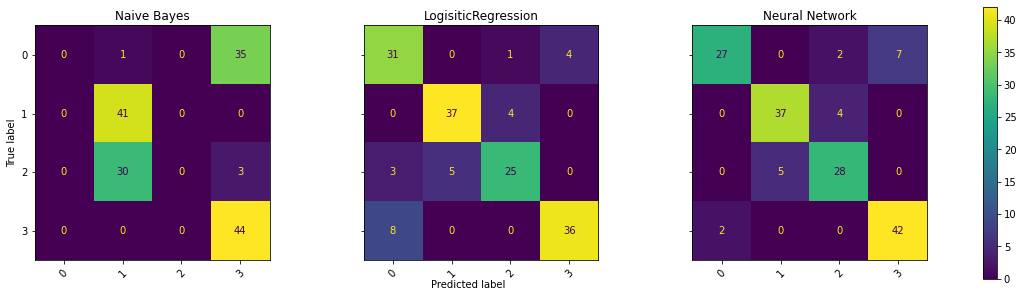

In [39]:
# adopted from https://stackoverflow.com/questions/61825227/plotting-multiple-confusion-matrix-side-by-side
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

classifiers = {
    "Naive Bayes": GaussianNB(),
    "LogisiticRegression": LogisticRegression(),
    "Neural Network": MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(4, 5), random_state=1,max_iter=500)
}

f, axes = plt.subplots(1, 3, figsize=(20, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(x_heat_train, y_heat_train.ravel()).predict(x_heat_test)
    cf_matrix = confusion_matrix(y_heat_test.ravel(), y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)


f.colorbar(disp.im_, ax=axes)
plt.show()
